In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

('MTO_pend_noise.csv', EmptyDataError('No columns to parse from file',))


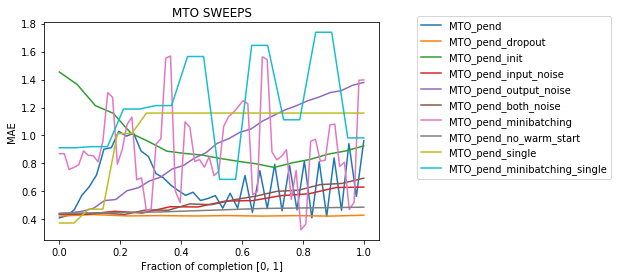

In [9]:
# MTO GRAPH
root_dir = "sweep_csvs/"
fnames = [
    "MTO_pend.csv",
    "MTO_pend_dropout.csv",
    "MTO_pend_init.csv",
    "MTO_pend_input_noise.csv",
    "MTO_pend_output_noise.csv",
    "MTO_pend_both_noise.csv",
    "MTO_pend_noise.csv",
    "MTO_pend_minibatching.csv",
    "MTO_pend_no_warm_start.csv"
]
fnames += [
    "MTO_pend_single.csv",
    "MTO_pend_minibatching_single.csv",
]

plt.figure()
plt.title("MTO SWEEPS")
y_str = 'MAE'

for fname in fnames:
    try:
        df = pd.read_csv(root_dir+fname)
    except Exception as e:
        print(fname, e)
        continue
#     print(df)

#     x_vals = df['time']; plt.xlabel('time')
#     x_vals = df['iters']; plt.xlabel('iters')
    x_vals = np.linspace(0, 1, df.shape[0]); plt.xlabel('Fraction of completion [0, 1]')


    y_vals = df[y_str]; plt.ylabel(y_str)
    

    label = fname.split('.')[0]
    plt.plot(x_vals, y_vals, label=label)
    
plt.legend(bbox_to_anchor=(1.1, 1.05))


('Igor_pend_dropout.csv', IOError(2, 'File sweep_csvs/Igor_pend_dropout.csv does not exist'))
('Igor_pend_init.csv', IOError(2, 'File sweep_csvs/Igor_pend_init.csv does not exist'))
('Igor_pend_input_noise.csv', IOError(2, 'File sweep_csvs/Igor_pend_input_noise.csv does not exist'))
('Igor_pend_output_noise.csv', IOError(2, 'File sweep_csvs/Igor_pend_output_noise.csv does not exist'))
('Igor_pend_both_noise.csv', IOError(2, 'File sweep_csvs/Igor_pend_both_noise.csv does not exist'))
('Igor_pend_noise.csv', IOError(2, 'File sweep_csvs/Igor_pend_noise.csv does not exist'))
('Igor_pend_minibatching.csv', IOError(2, 'File sweep_csvs/Igor_pend_minibatching.csv does not exist'))
('Igor_pend_no_warm_start.csv', IOError(2, 'File sweep_csvs/Igor_pend_no_warm_start.csv does not exist'))


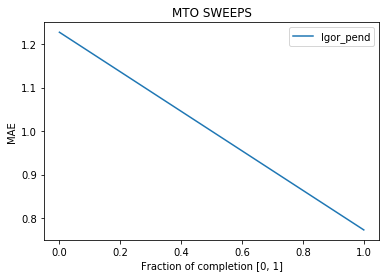

In [38]:
# MTO GRAPH
root_dir = "sweep_csvs/"
fnames = [
    "Igor_pend.csv",
    "Igor_pend_dropout.csv",
    "Igor_pend_init.csv",
    "Igor_pend_input_noise.csv",
    "Igor_pend_output_noise.csv",
    "Igor_pend_both_noise.csv",
    "Igor_pend_noise.csv",
    "Igor_pend_minibatching.csv",
    "Igor_pend_no_warm_start.csv"
]

plt.figure()
plt.title("MTO SWEEPS")
y_str = 'MAE'

for fname in fnames:
    try:
        df = pd.read_csv(root_dir+fname)
    except Exception as e:
        print(fname, e)
        continue
#     print(df)

#     x_vals = df['time']; plt.xlabel('time')
#     x_vals = df['iters']; plt.xlabel('iters')
    x_vals = np.linspace(0, 1, df.shape[0]); plt.xlabel('Fraction of completion [0, 1]')


    y_vals = df[y_str]; plt.ylabel(y_str)
    

    label = fname.split('.')[0]
    plt.plot(x_vals, y_vals, label=label)
    
plt.legend()